In [1]:
pip install rioxarray rasterio geopandas rasterstats earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 57.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 74.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 85.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 76.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 5.6 MB/s eta 0:00:00
 

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.ma as map
import pandas as pd
import rioxarray as rxr
from rasterio.plot import plotting_extent
import geopandas as gpd
import rasterstats as rs
import earthpy as et
import earthpy.plot as ep

sns.set_style("white")
sns.set(font_scale=1.5)

In [3]:
data = et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(et.io.HOME,'earth-analytics',
                                'data'))

Extracted output to /home/codespace/earth-analytics/data/spatial-vector-lidar/.


In [4]:
sjer_lidar_chm_path = os.path.join("spatial-vector-lidar", 
                                   "california",
                                   "neon-sjer-site",
                                    "2013",
                                    "lidar",
                                    "SJER_lidarCHM.tif")

sjer_chm_data = rxr.open_rasterio(sjer_lidar_chm_path, masked=True).squeeze()

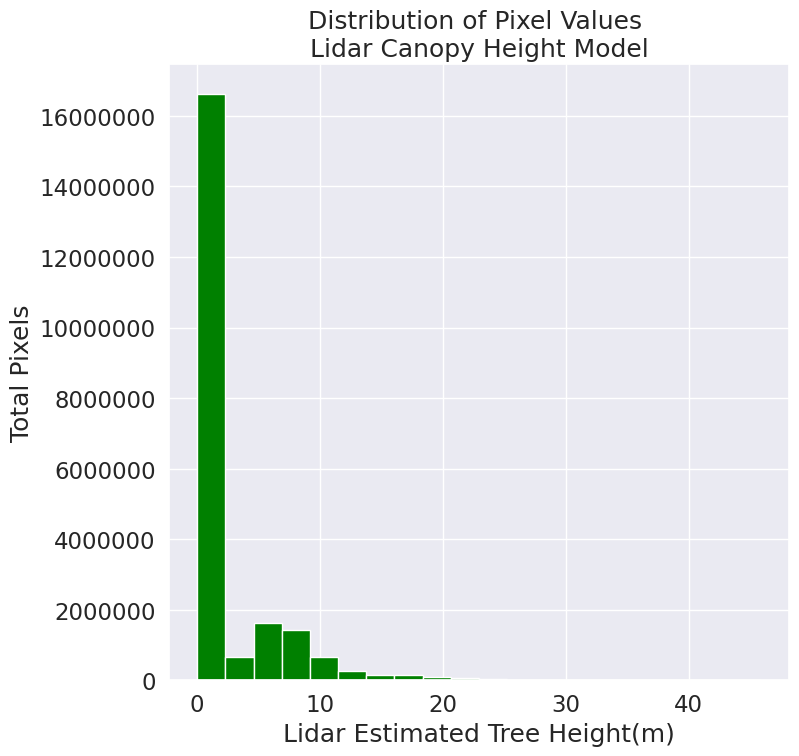

In [6]:
ax = ep.hist(sjer_chm_data.values,
            figsize=(8,8),
            colors="green",
            xlabel="Lidar Estimated Tree Height(m)",
            ylabel="Total Pixels",
            title="Distribution of Pixel Values \nLidar Canopy Height Model")

ax[1].ticklabel_format(useOffset=False,
                       style='plain')

In [7]:

sjer_chm_data.mean().values

array(1.9355862, dtype=float32)

In [8]:
print('Mean:', sjer_chm_data.mean().values)
print('Max:', sjer_chm_data.max().values)
print('Min:', sjer_chm_data.min().values)

Mean: 1.9355862
Max: 45.879997
Min: 0.0


In [9]:
sjer_chm_data_no_zeros = sjer_chm_data.where(sjer_chm_data != 0, np.nan)

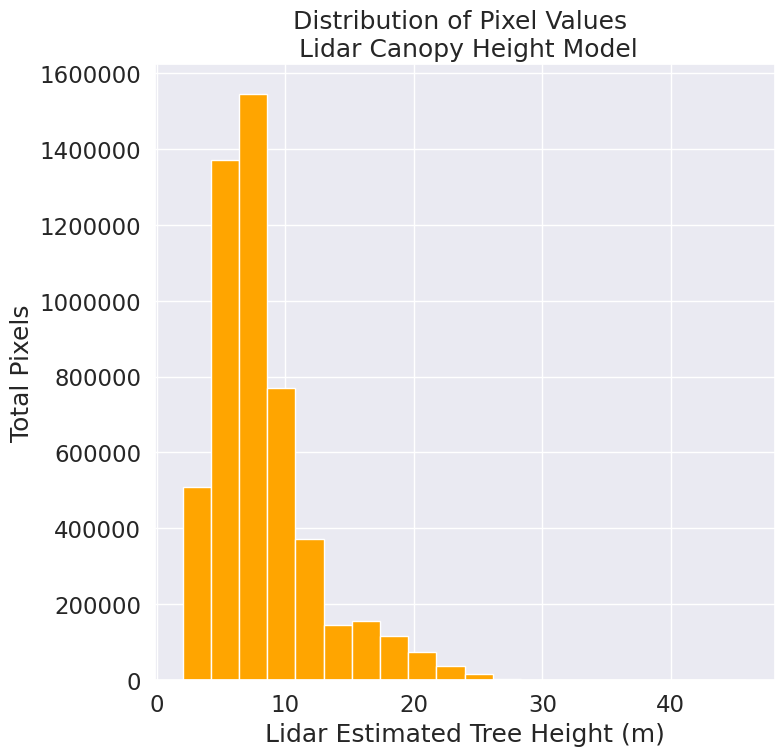

In [10]:
ax = ep.hist(sjer_chm_data_no_zeros.values,
             figsize=(8, 8),
             colors="orange",
             xlabel="Lidar Estimated Tree Height (m)",
             ylabel="Total Pixels",
             title="Distribution of Pixel Values \n Lidar Canopy Height Model")

ax[1].ticklabel_format(useOffset=False,
                       style='plain')

In [11]:
sjer_centroids_path = os.path.join("spatial-vector-lidar",
                                   "california", 
                                   "neon-sjer-site",
                                   "vector_data", 
                                   "SJER_plot_centroids.shp")

sjer_plots_points = gpd.read_file(sjer_centroids_path)

In [12]:
sjer_plots_points.head()

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)


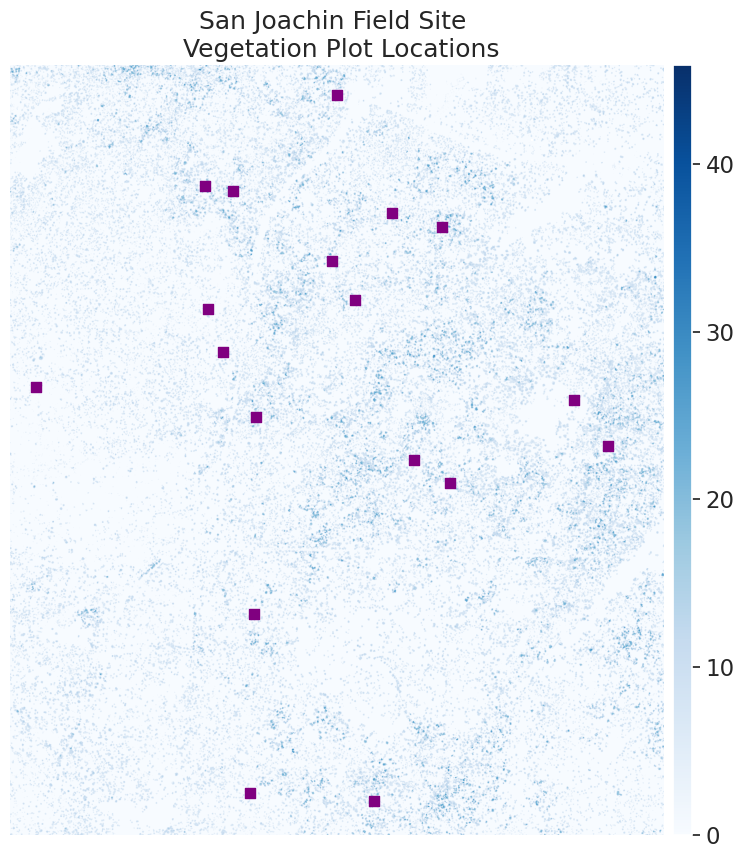

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

ep.plot_bands(sjer_chm_data,
              extent=plotting_extent(sjer_chm_data,sjer_chm_data.rio.transform()),
              cmap='Blues',
              title="San Joachin Field Site \n Vegetation Plot Locations",
              scale=False,
              ax=ax)

sjer_plots_points.plot(ax=ax,
                       marker='s',
                       markersize=45,
                       color='purple')
ax.set_axis_off()

plt.show()

In [14]:
sjer_plots_poly = sjer_plots_points.copy()

sjer_plots_poly["geometry"] = sjer_plots_poly.geometry.buffer(20)

sjer_plots_poly.head()

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,"POLYGON ((255872.376 4111567.818, 255872.280 4..."
1,SJER112,center,4111298.971,257406.967,trees,"POLYGON ((257426.967 4111298.971, 257426.871 4..."
2,SJER116,center,4110819.876,256838.760,grass,"POLYGON ((256858.760 4110819.876, 256858.664 4..."
3,SJER117,center,4108752.026,256176.947,trees,"POLYGON ((256196.947 4108752.026, 256196.851 4..."
4,SJER120,center,4110476.079,255968.372,grass,"POLYGON ((255988.372 4110476.079, 255988.276 4..."


In [15]:

output_path = os.path.join("spatial-vector-lidar", "outputs")

if not os.path.isdir(output_path):
    os.mkdir(output_path)


plot_buffer_path = os.path.join(output_path, "plot_buffer.shp")

sjer_plots_poly.to_file(plot_buffer_path)

In [16]:
sjer_tree_heights = rs.zonal_stats(plot_buffer_path,
                                   sjer_chm_data_no_zeros.values,
                                   nodata=-999,
                                   affine=sjer_chm_data_no_zeros.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   stats="count min mean max median")

In [17]:
sjer_tree_heights

[{'geometry': {'coordinates': [[(255872.376, 4111567.818),
     (255872.27969453344, 4111565.857657193),
     (255871.99170560806, 4111563.9161935598),
     (255871.51480671464, 4111562.012306455),
     (255870.85359065022, 4111560.164331353),
     (255870.01442528696, 4111558.3900652635),
     (255869.00539224604, 4111556.7065953393),
     (255867.83620906723, 4111555.1301343166),
     (255866.51813562372, 4111553.675864376),
     (255865.06386568327, 4111552.3577909325),
     (255863.48740466038, 4111551.1886077537),
     (255861.8039347365, 4111550.179574713),
     (255860.0296686473, 4111549.3404093497),
     (255858.18169354508, 4111548.6791932853),
     (255856.2778064403, 4111548.202294392),
     (255854.33634280658, 4111547.9143054667),
     (255852.376, 4111547.818),
     (255850.4156571934, 4111547.9143054667),
     (255848.47419355967, 4111548.202294392),
     (255846.5703064549, 4111548.6791932853),
     (255844.72233135268, 4111549.3404093497),
     (255842.94806526348, 41

In [18]:
sjer_lidar_height_df = gpd.GeoDataFrame.from_features(sjer_tree_heights)

sjer_lidar_height_df.head()

,geometry,Plot_ID,Point,northing,easting,plot_type,min,max,mean,count,median
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,2.04,19.049999,11.544347,161,12.62
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,2.10,24.019999,10.369277,443,7.87
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,2.82,16.070000,7.518398,643,6.80
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,3.24,11.059999,7.675346,245,7.93
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,3.38,5.740000,4.591177,17,4.45


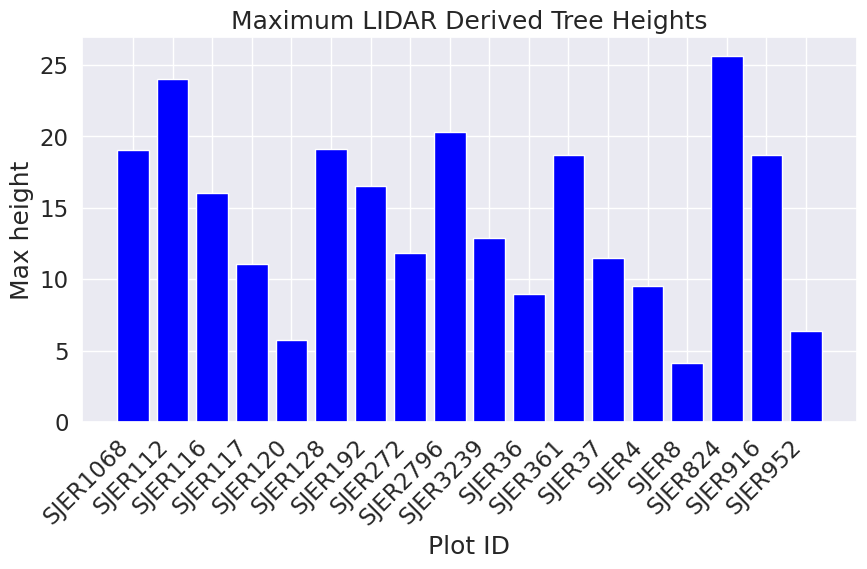

In [19]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(sjer_lidar_height_df["Plot_ID"], sjer_lidar_height_df["max"], color="blue")

ax.set(xlabel="Plot ID", ylabel="Max height", title="Maximum LIDAR Derived Tree Heights")

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment="right")

plt.show()